# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]

        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | kertih
Processing Record 4 of Set 1 | peace river
Processing Record 5 of Set 1 | vizinga
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | santarem
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | bartica
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bamboo flat
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | puerto san jose
Processing Record 22 of Set 1 | weno
Processing Record 23 of Set 1 | ghan

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-2.02,67,2,4.63,GS,1712884113
1,port-aux-francais,-49.3500,70.2167,5.80,85,100,3.44,TF,1712884113
2,kertih,4.5141,103.4483,26.01,94,40,0.00,MY,1712883850
3,peace river,56.2501,-117.2860,13.13,31,100,1.79,CA,1712884113
4,vizinga,61.0749,50.1031,4.41,83,80,4.67,RU,1712884113


In [35]:
import os
# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)

In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.02,67,2,4.63,GS,1712884113
1,port-aux-francais,-49.3500,70.2167,5.80,85,100,3.44,TF,1712884113
2,kertih,4.5141,103.4483,26.01,94,40,0.00,MY,1712883850
3,peace river,56.2501,-117.2860,13.13,31,100,1.79,CA,1712884113
4,vizinga,61.0749,50.1031,4.41,83,80,4.67,RU,1712884113


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

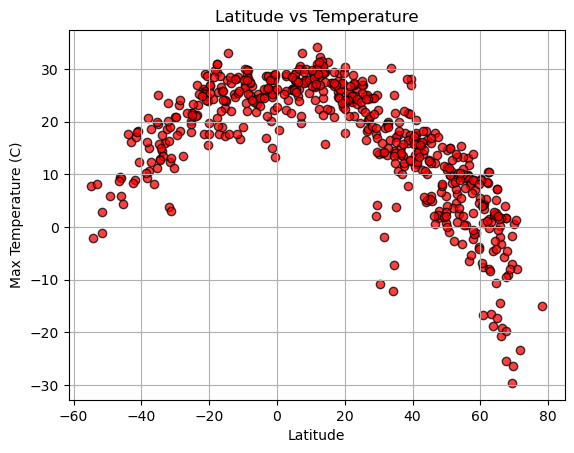

In [38]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

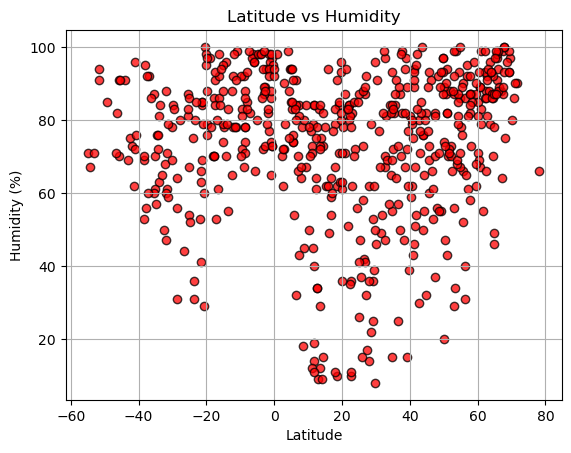

In [39]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

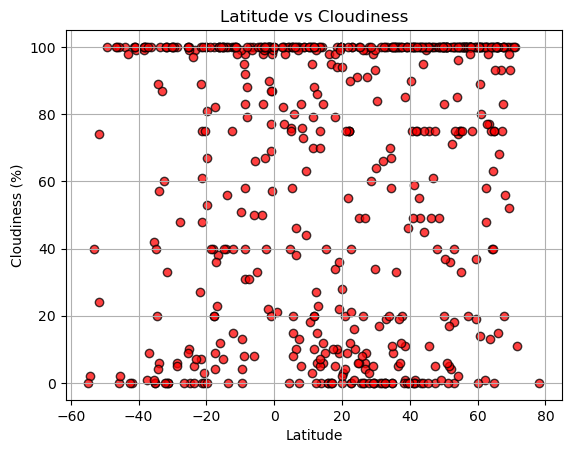

In [40]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

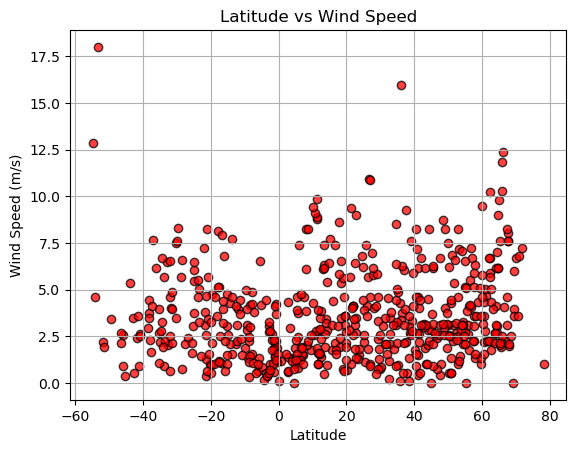

In [41]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kertih,4.5141,103.4483,26.01,94,40,0.00,MY,1712883850
3,peace river,56.2501,-117.2860,13.13,31,100,1.79,CA,1712884113
4,vizinga,61.0749,50.1031,4.41,83,80,4.67,RU,1712884113
9,bartica,6.4000,-58.6167,26.18,91,10,1.31,GY,1712884114
10,ilulissat,69.2167,-51.1000,-6.99,93,100,0.00,GL,1712883906


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.02,67,2,4.63,GS,1712884113
1,port-aux-francais,-49.3500,70.2167,5.80,85,100,3.44,TF,1712884113
5,adamstown,-25.0660,-130.1015,21.64,54,10,5.45,PN,1712884113
6,afaahiti,-17.7500,-149.2833,29.48,86,100,8.12,PF,1712884113
7,santarem,-2.4431,-54.7083,26.07,94,40,1.03,BR,1712884113


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8515187166831746


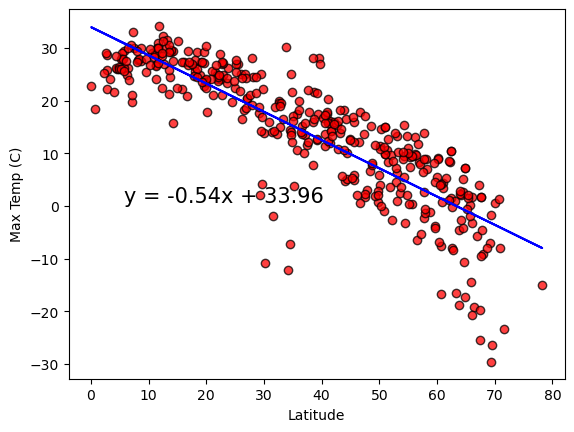

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7479142480799246


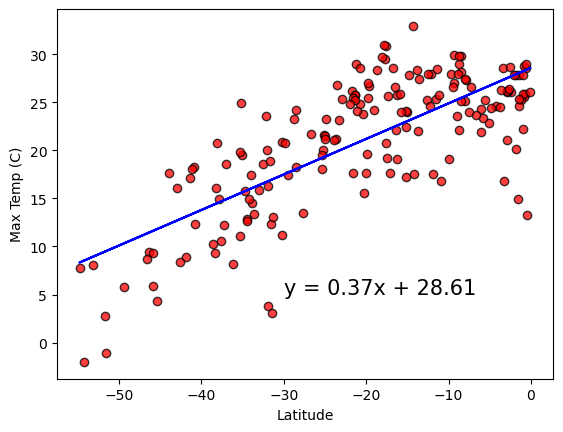

In [75]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** It seems like the higher the latitude the lower the temperature on the Northern Hemisphere, whereas, on the Southern Hemisphere, the higher the latitude the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

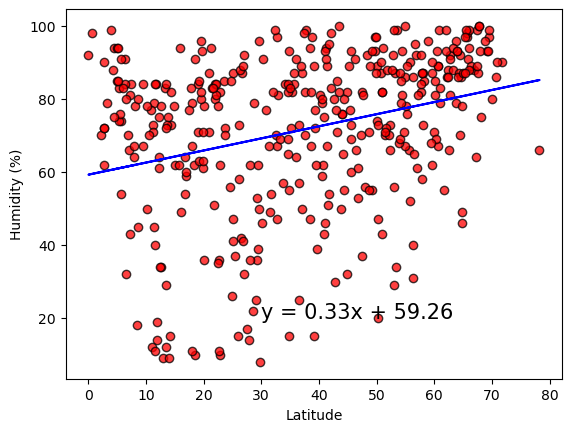

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(30,20),fontsize=15,color="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

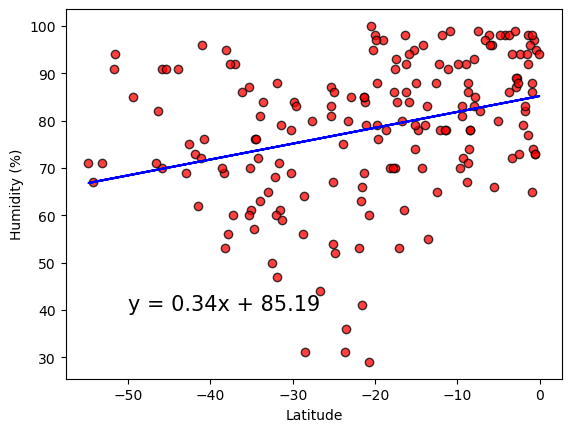

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** It seems like for both Hemispheres the higher the latitude the greater the humidity percentage.

### Cloudiness vs. Latitude Linear Regression Plot

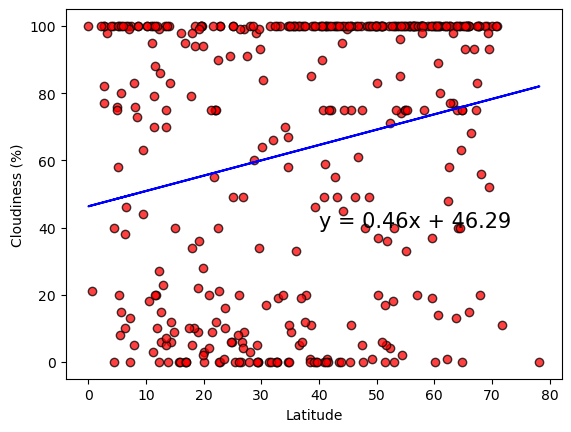

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(40,40),fontsize=15,color="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

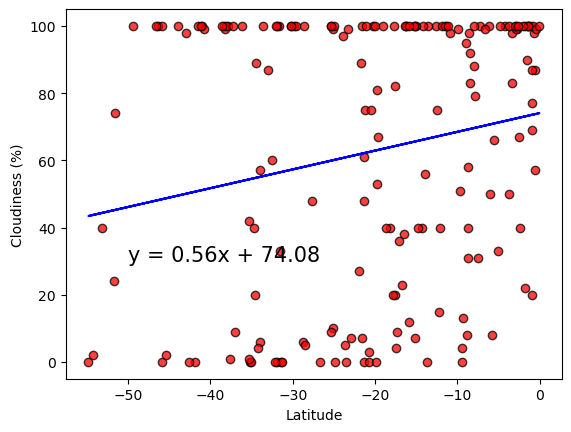

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** It seems like for both Hemispheres the higher the latitude the greater the cloudiness percentage.

### Wind Speed vs. Latitude Linear Regression Plot

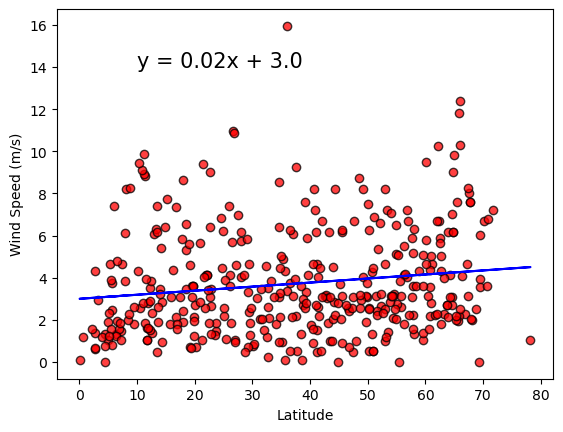

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(10,14),fontsize=15,color="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

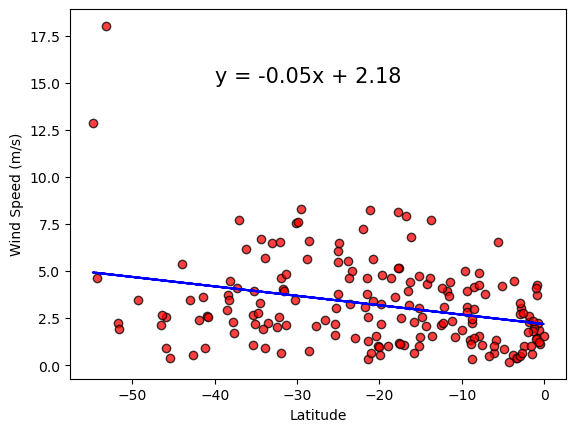

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** It seems like for both Hemispheres as the latitude increases, the changes in wind speed are very subtle.